## Logistic Regression for Diagnosing Temporal Lobe Epilepsy (TLE)

****

### Name

Hengyi Liu

****

## Python modules

All the Python modules needed to complete this project are provided to you. 

<span style="background-color: #FFFF00">**No other modules are authorized** and **if other modules are added points will be deducted**.</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as acc
from scipy.optimize import minimize
import pandas as pd 
import math
import warnings
warnings.filterwarnings('ignore')

****

### Identifying TLE biomarkers in neurological data.

<img src="./images/subcortical_gray_matter_structures.png" width="400" style="float: right"/>

The Enigma dataset examines differences between the healthy brain and the brain of a patient with temporal lobe epilepsy (TLE) by analyzing subcortical gray matter structures.

The dataset has the following fields:
- Diagnosis label where 0= healthy and 1=TLE (`Dx`)
- Surface area ($mm^2$) of the left and right thalamus (`L_thal` and `R_thal`).
- Surface area ($mm^2$) of the left and right caudate nucleus (`L_caud` and `R_caud`).
- Surface area ($mm^2$) of the left and right putamen (`L_put and R_put`).
- Surface area ($mm^2$) of the left and right pallidum (`L_pal` and `R_pal`).
- Surface area ($mm^2$) of the left and right hippocampus (`L_hippo` and `R_hipp`).

Tips:
- This numpy <a href="https://numpy.org/doc/stable/user/absolute_beginners.html">tutorial</a> may be helpful.
- This dataframe <a href="https://pandas.pydata.org/docs/user_guide/indexing.html">selecting, slicing, and extracting tutorial</a> may be helpful.
- This dataframe <a href="https://www.geeksforgeeks.org/python/filter-pandas-dataframe-with-multiple-conditions/">conditional filtering tutorial</a> may be helpful.

****

In [2]:
df = pd.read_csv("./data/enigma.csv")
df

,Dx,L_thal,R_thal,L_caud,R_caud,L_put,R_put,L_pal,R_pal,L_hippo,R_hippo,L_amyg,R_amyg
0,0,7829.0,7568.0,3301.0,3694.0,4942.0,5403.0,1627.0,1920.0,3927.0,3844.0,1442.0,1409.0
1,0,7567.0,7578.0,3467.0,3494.0,5282.0,5255.0,1769.0,1670.0,4657.0,4582.0,1596.0,1595.0
2,0,7823.0,8228.0,4218.0,4092.0,5473.0,5562.0,1876.0,1450.0,4909.0,4497.0,1550.0,1460.0
3,0,8022.0,8030.0,3892.0,3789.0,5220.0,5510.0,1663.0,1655.0,4551.0,4606.0,1554.0,1594.0
4,0,8443.0,7831.0,4291.0,4400.0,6516.0,6326.0,1915.0,1881.0,4619.0,4338.0,1752.0,1795.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,1,6808.2,6034.1,2871.5,3018.9,5251.6,4940.2,1255.0,1182.4,3801.8,3737.1,1697.7,1913.7
1232,1,7466.2,6745.6,3289.1,3524.0,5236.6,5737.7,1467.4,1505.2,3283.6,4356.0,1456.1,1472.2
1233,1,8123.5,6577.2,4253.8,4485.0,5199.6,5815.4,1523.6,1605.8,4486.9,4911.1,1729.8,1994.2
1234,1,9480.4,6428.7,4080.6,4283.0,4822.9,5902.5,1163.5,1362.4,3559.1,4128.0,1522.9,2447.7


****

**P1** (5 Points): Data Visualization.

<img src="./images/p1_solution.png" width="600" style="float: right"/>

Create a combined scatter plot that visualizes the relationships between subcortical gray matter structures.
- `Left Hippocampus` and `Right Hippocampus`, 
- `Left Caudate Nucleus` and `Right Caudate Nucleus`, 

To receive full credit, your new dataframe must generate scatter plots identical to the ones provided.

You may assume:
- All the data (in your dataframe) is used to generate these scatter plots.
- The colors used to generate plots are blue (healthy) and red (TLE).
- The plot figure size is 10 inches in width and 5 inches in height.
- The plot figure uses a tight layout.
- The default x-axis, y-axis, and z-axis tick values are used.
- The scatter plot marker size is 30.
- The alpha (opacity) value is 0.25.




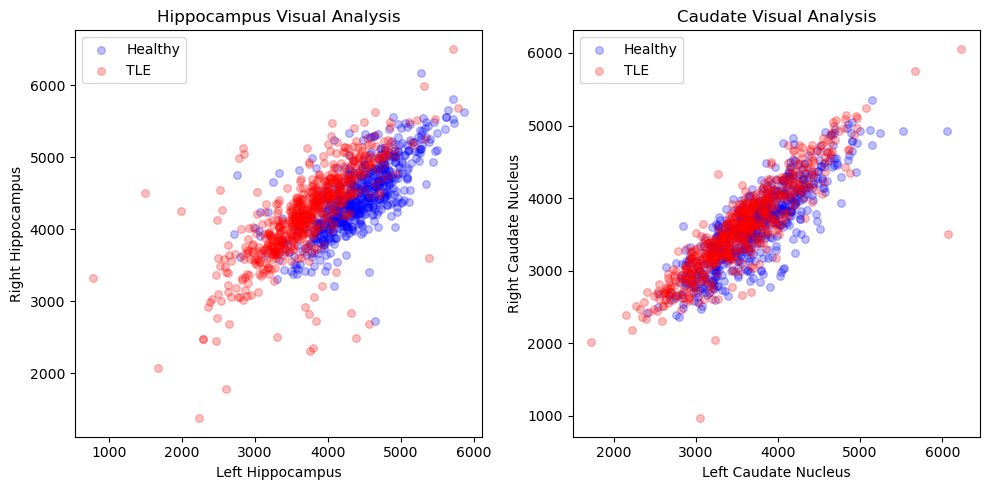

In [3]:
# --------------------------------------
# Add your P1 coding solution below.
# --------------------------------------

fig = plt.figure(figsize=(10, 5))

healthy = df[df["Dx"] == 0]
tle = df[df["Dx"] == 1]

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(healthy["L_hippo"], healthy["R_hippo"], color="blue", s=30, alpha=0.25, label="Healthy", zorder=0)
ax1.scatter(tle["L_hippo"], tle["R_hippo"], color="red", s=30, alpha=0.25, label="TLE", zorder=1)
ax1.set_title("Hippocampus Visual Analysis")
ax1.set_xlabel("Left Hippocampus")
ax1.set_ylabel("Right Hippocampus")
ax1.legend(loc="upper left")

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(healthy["L_caud"], healthy["R_caud"], color="blue", s=30, alpha=0.25, label="Healthy", zorder=0)
ax2.scatter(tle["L_caud"], tle["R_caud"], color="red", s=30, alpha=0.25, label="TLE", zorder=1)
ax2.set_title("Caudate Visual Analysis")
ax2.set_xlabel("Left Caudate Nucleus")
ax2.set_ylabel("Right Caudate Nucleus")
ax2.legend(loc="upper left")

fig.tight_layout()
plt.show()

****

<img src="./images/p2_solution.png" width="500" style="float: right"/>

**P2** (10 Points): Gradient descent optimized logistic regression model.

Using the dataframe, this question will construct and evaluate a logistic regression classification model that predicts the label (Healthy and TLE) based on the surface area measurements of the right and left hippocampus. The gradient descent method will be used to estimate the optimal parameters. You can write your own iterative solution or use the SciPy <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">minimize</a> function (see authorized Python modules above).

Before model construction and evaluation, the data will be randomly shuffled and then partitioned into two sets using an 80/20 split. Specifically, 80% of the data will be used to train, and 20% will be reserved for testing. 

The accuracy (ACC) measure for both the training and testing data sets is reported in the plot title. These may be calculated using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html">accuracy_score</a> function (see authorized Python modules above).

To receive full credit, your solution must generate a plot similar to the reference plot. <span style="background-color: #FFFF00">**Note**: because the data is randomly shuffled each time the cell is run, your plot and measures will be slightly different than those provided in the reference plot.</span>

You may assume:
- Only the training data is used to generate the scatter plots.
- The colors used to generate plots are blue (Healthy), red (TLE), and green (fitted decision boundary).
- The default x-axis, y-axis, and z-axis tick values are used.
- You choose the free parameters (e.g., learning rate ($\alpha$), regularization ($\lambda$), iterations ($N$)).
- The scatter plot marker size is 30.
- The alpha (opacity) value is 0.25.
- The method parameter used in the minimize function is L-BFGS-B.


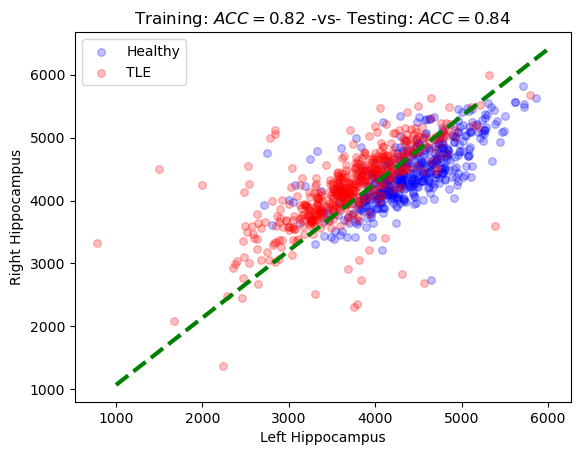

In [4]:
# --------------------------------------
# Add your P2 coding solution below.
# --------------------------------------

# own iterative solution
# Attempted for Extra Credits, mentioned by Professor Munsell in class:
# Implemented grid search for hyperparameters with k-fold cross-validation

gradient_norm_threshold = 10 ** -8

def data_random_partition(df, training_fraction):
    if training_fraction > 0.5:
        df_test = df.sample(frac=(1-training_fraction))
        df_train = df.drop(df_test.index)
    else:
        df_train = df.sample(frac=training_fraction)
        df_test = df.drop(df_train.index)
    return df_train, df_test

def get_x_matrix(df, predictors):
    x = df[predictors].to_numpy()
    bias_coeff = np.ones((x.shape[0], 1))
    return np.hstack((bias_coeff, x))

def get_y_matrix(df, target):
    return df[[target]].to_numpy()

def sigmoid(matrix):
    matrix = np.asarray(matrix)
    result = np.empty_like(matrix, dtype=np.float64)

    pos_indices = matrix >= 0
    neg_indices = ~pos_indices

    result[pos_indices] = 1 / (1 + np.exp(-matrix[pos_indices]))
    numerator = np.exp(matrix[neg_indices])
    result[neg_indices] = numerator / (1 + numerator)

    return result

def own_iterative_method(x, y, alpha, reg_lambda):
    n = 1000
    theta = np.zeros((x.shape[1], 1))
    for i in range(1, n + 1):
        gradient = -(x.T @ y - x.T @ sigmoid(x @ theta) ) / x.shape[0]

        reg_term = (reg_lambda * theta) / x.shape[0]
        reg_term[0] = 0
        gradient = gradient + reg_term

        gradient_norm = np.linalg.norm(gradient)
        if gradient_norm < gradient_norm_threshold:
            break

        theta = theta - alpha * gradient
        alpha = 1/i

    return theta

def train_model(df_train, predictors, target, method, alpha, reg_lambda):
    x = get_x_matrix(df_train, predictors)
    y = get_y_matrix(df_train, target)
    if method == "own iterative":
        theta = own_iterative_method(x, y, alpha, reg_lambda)
    elif method == "minimize":
        theta = minimize_method(x, y)
    elif method == "stochastic own iterative":
        theta = stochastic_own_iterative_method(x, y, alpha, reg_lambda)
    elif method == "stochastic minimize":
        theta = stochastic_minimize_method(x, y)
    else:
        raise ValueError(f"Unknown method: {method}")
    predicted = sigmoid(x @ theta)

    return theta, predicted

def performance_eval(df, target, predicted_probability):
    true_labels = df[target]
    predicted_labels = (predicted_probability >= 0.5).astype(int)
    return acc(true_labels, predicted_labels)

def test_model(df, predictors, theta):
    x = get_x_matrix(df, predictors)
    return sigmoid(x @ theta)

def k_fold_cross_validation(k, x, y, alpha, reg_lambda, method):
    x_indices = np.arange(x.shape[0])
    np.random.shuffle(x_indices)
    fold_indices = np.array_split(x_indices, k)

    accuracies = []
    for fold_index in range(k):
        test_indices = fold_indices[fold_index]
        train_indices = np.hstack([fold_indices[i] for i in range(k) if i != fold_index])
        x_train, y_train = x[train_indices], y[train_indices]
        x_test, y_test = x[test_indices], y[test_indices]

        if method == "own iterative":
            theta = own_iterative_method(x_train, y_train, alpha, reg_lambda)
        elif method == "stochastic own iterative":
            theta = stochastic_own_iterative_method(x_train, y_train, alpha, reg_lambda)

        predicted_probability = sigmoid(x_test @ theta)
        predicted_labels = (predicted_probability >= 0.5).astype(int)
        accuracies.append(acc(y_test, predicted_labels))

    return accuracies

def grid_search_for_hyper_parameters(df_train, df_test, predictors, target, method):
    alpha_values = [0.001, 0.01, 0.1]
    lambda_values = [0, 0.01, 0.1, 1]
    best_accuracy = 0
    best_hyper_params = {
        "alpha": 0.1, 
        "reg_lambda": 0.1
    }
    x = get_x_matrix(df_train, predictors)
    y = get_y_matrix(df_train, target)
    for alpha in alpha_values:
        for reg_lambda in lambda_values:
            accuracies = k_fold_cross_validation(5, x, y, alpha, reg_lambda, method)
            accuracy = np.mean(accuracies)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_hyper_params = {
                    "alpha": alpha, 
                    "reg_lambda": reg_lambda
                }

    return best_accuracy, best_hyper_params

def plotting(acc_train, acc_test, theta, df, predictors, predictor_labels, target, target_labels):
    title_str = "Training: $ACC={0:.2f}$ -vs- Testing: $ACC={1:.2f}$"
    title_str_filled = title_str.format(acc_train, acc_test)

    decision_boundary_x = np.linspace(1000, 6000, 100)
    decision_boundary_y =  (-theta[1] * decision_boundary_x - theta[0]) / theta[2]

    label0_index = df[target] == 0
    df_label0 = df[label0_index]
    df_label1 = df[~label0_index]

    fig, ax = plt.subplots()
    ax.scatter(df_label0[predictors[0]], df_label0[predictors[1]], color="blue", s=30, alpha=0.25, label=target_labels[0], zorder=0)
    ax.scatter(df_label1[predictors[0]], df_label1[predictors[1]], color="red", s=30, alpha=0.25, label=target_labels[1], zorder=1)
    ax.plot(decision_boundary_x, decision_boundary_y, linestyle="--", color="green", linewidth=3, zorder=2)
    ax.set_title(title_str_filled)
    ax.set_xlabel(predictor_labels[0])
    ax.set_ylabel(predictor_labels[1])
    ax.legend(loc="upper left")
    plt.show()

def my_iterative_logistic_regression(df, predictors, predictor_labels, target, target_labels, training_fraction, method):
    df_train, df_test = data_random_partition(df, training_fraction)
    best_hyper_params = {
        "alpha": 0.1, 
        "reg_lambda": 0.1
    }
    if method == "own iterative" or method == "stochastic own iterative":
        best_accuracy, best_hyper_params = grid_search_for_hyper_parameters(df_train, df_test, predictors, target, method)
    theta, train_predicted = train_model(df_train, predictors, target, method, **best_hyper_params)
    acc_train = performance_eval(df_train, target, train_predicted)

    test_predicted = test_model(df_test, predictors, theta)
    acc_test = performance_eval(df_test, target, test_predicted)

    plotting(acc_train, acc_test, theta, df_train, predictors, predictor_labels, target, target_labels)


my_iterative_logistic_regression(
    df, 
    predictors=["L_hippo", "R_hippo"], 
    predictor_labels=["Left Hippocampus", "Right Hippocampus"], 
    target="Dx", 
    target_labels=["Healthy", "TLE"], 
    training_fraction=0.8, 
    method="own iterative"
)

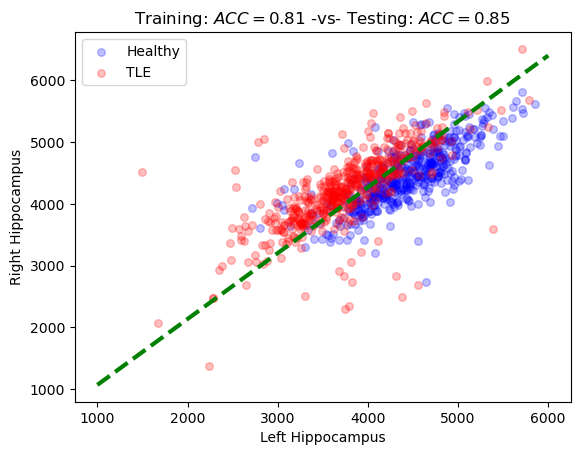

In [5]:
# --------------------------------------
# Add your P2 coding solution below.
# --------------------------------------

# iterative solution using minimize

def minimize_method(x, y):
    reg_lambda = 1.0

    def my_fun(theta, x, y):
        n = x.shape[0]
        term1 = y.T @ (x @ theta)
        term2 = np.sum(np.log(sigmoid(-(x @ theta))))
        log_likelihood = -(term1 + term2) / n

        reg_term = (reg_lambda * np.sum(theta[1:] ** 2)) / (2 * n)
        return log_likelihood + reg_term

    def my_jac(theta, x, y):
        n = x.shape[0]
        gradient = -(x.T @ y - x.T @ sigmoid(x @ theta) ) / n

        reg_term = (reg_lambda * theta) / n
        reg_term[0] = 0
        return gradient + reg_term

    optimize_result = minimize(my_fun, np.zeros(x.shape[1]), args=(x, y.flatten()), method="L-BFGS-B", jac=my_jac)
    theta = optimize_result.x

    return theta.reshape(-1, 1)

my_iterative_logistic_regression(
    df, 
    predictors=["L_hippo", "R_hippo"], 
    predictor_labels=["Left Hippocampus", "Right Hippocampus"], 
    target="Dx", 
    target_labels=["Healthy", "TLE"], 
    training_fraction=0.8, 
    method="minimize"
)

****

<img src="./images/p3_solution.png" width="500" style="float: right"/>

**P3** (10 Points): Stochastic gradient descent optimized logistic regression model.

Using the dataframe, this question will construct and evaluate a logistic regression classification model that predicts the label (Healthy and TLE) based on the surface area measurements of the right and left caudate nucleus. The stochastic gradient descent method will be used to estimate the optimal parameters. You can write your own iterative solution or use the SciPy <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">minimize</a> function (see authorized Python modules above).

Before model construction and evaluation, the data will be randomly shuffled and then partitioned into two sets using an 80/20 split. Specifically, 80% of the data will be used to train, and 20% will be reserved for testing. 

The accuracy (ACC) measure for both the training and testing data sets is reported in the plot title. These may be calculated using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html">accuracy_score</a> function (see authorized Python modules above).

To receive full credit, your solution must generate a plot similar to the reference plot. <span style="background-color: #FFFF00">**Note**: because the data is randomly shuffled each time the cell is run, your plot and measures will be slightly different than those provided in the reference plot.</span>

You may assume:
- Only the training data is used to generate the scatter plots.
- The colors used to generate plots are blue (Healthy), red (TLE), and green (fitted decision boundary).
- The default x-axis, y-axis, and z-axis tick values are used.
- You choose the free parameters (e.g., learning rate ($\alpha$), regularization ($\lambda$), iterations ($N$)).
- The scatter plot marker size is 30.
- The alpha (opacity) value is 0.25.
- The method parameter used in the minimize function is SLSQP.
- A 5% random sample is used in the gradient calculation.


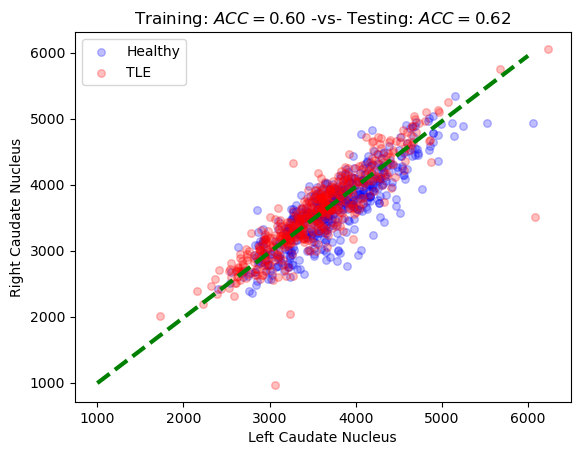

In [6]:
# --------------------------------------
# Add your P3 coding solution below.
# --------------------------------------

# own iterative solution
# Attempted for Extra Credits, mentioned by Professor Munsell in class:
# Implemented grid search for hyperparameters with k-fold cross-validation

def stochastic_own_iterative_method(x, y, alpha, reg_lambda):
    n = 1000
    theta = np.random.randn(x.shape[1], 1) * 0.01
    for i in range(1, n+1):
        num_rows = x.shape[0]
        sample_size = math.ceil(0.05 * num_rows)
        indices = np.random.choice(num_rows, size=sample_size, replace=False)
        xs = x[indices]
        ys = y[indices]

        gradient = -(xs.T @ ys - xs.T @ sigmoid(xs @ theta) ) / sample_size

        reg_term = (reg_lambda * theta) / sample_size
        reg_term[0] = 0
        gradient = gradient + reg_term

        gradient_norm = np.linalg.norm(gradient)
        if gradient_norm < gradient_norm_threshold:
            break

        theta = theta - alpha * gradient
        alpha = 1/i

    return theta

my_iterative_logistic_regression(
    df, 
    predictors=["L_caud", "R_caud"], 
    predictor_labels=["Left Caudate Nucleus", "Right Caudate Nucleus"], 
    target="Dx", 
    target_labels=["Healthy", "TLE"], 
    training_fraction=0.8, 
    method="stochastic own iterative"
)

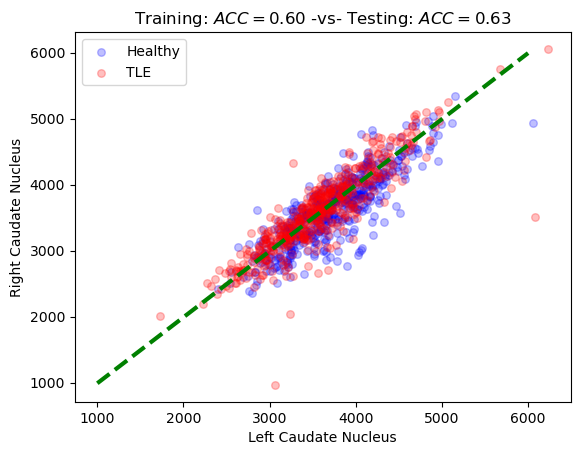

In [7]:
# --------------------------------------
# Add your P3 coding solution below.
# --------------------------------------

# iterative solution using minimize

def stochastic_minimize_method(x, y):
    reg_lambda = 1.0

    def my_fun(theta, x, y):
        n = x.shape[0]

        term1 = y.T @ (x @ theta)
        term2 = np.sum(np.log(sigmoid(-(x @ theta))))
        log_likelihood = -(term1 + term2) / n

        reg_term = (reg_lambda * np.sum(theta[1:] ** 2)) / (2 * n)
        return log_likelihood + reg_term

    def my_jac(theta, x, y):
        num_rows = x.shape[0]
        sample_size = math.ceil(0.05 * num_rows)
        indices = np.random.choice(num_rows, size=sample_size, replace=False)
        xs = x[indices]
        ys = y[indices]

        gradient = -(xs.T @ ys - xs.T @ sigmoid(xs @ theta) ) / sample_size

        reg_term = (reg_lambda * theta) / sample_size
        reg_term[0] = 0
        return gradient + reg_term

    optimize_result = minimize(my_fun, np.random.randn(x.shape[1]) * 0.01, args=(x, y.flatten()), method="SLSQP", jac=my_jac)
    theta = optimize_result.x

    return theta.reshape(-1, 1)

my_iterative_logistic_regression(
    df, 
    predictors=["L_caud", "R_caud"], 
    predictor_labels=["Left Caudate Nucleus", "Right Caudate Nucleus"], 
    target="Dx", 
    target_labels=["Healthy", "TLE"], 
    training_fraction=0.8, 
    method="stochastic minimize"
)